In [3]:
import numpy as np
import pandas as pd
import torch
from torch import nn

import Util
import tsGAN
#%run -i 'tsGAN.py'

import os

import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
sns.set_style('white')
sns.set_context('poster')

In [5]:
# CSV path
folder_name = "data"
file_name = "hungary_chickenpox.csv"
path = os.path.join(folder_name, file_name)
#Load CSV into Dataframe
df = pd.read_csv(path,sep=',')
df = df.drop(columns = ['Date'])

In [6]:
# Get column names
names = Util.get_column_names(df)

In [7]:
#Showing the different counties in Hungary
df.keys()

Index(['BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD', 'CSONGRAD', 'FEJER',
       'GYOR', 'HAJDU', 'HEVES', 'JASZ', 'KOMAROM', 'NOGRAD', 'PEST', 'SOMOGY',
       'SZABOLCS', 'TOLNA', 'VAS', 'VESZPREM', 'ZALA'],
      dtype='object')

In [20]:
# fig, axes = plt.subplots(1,3,figsize=(20,5))

# sns.lineplot(data=df,x=df.index,y='BUDAPEST',ax=axes[0])
# axes[0].set_xticks(np.arange(0,550,100))
# axes[0].set_xlabel('Weeks')
# axes[0].set_ylabel('Chicken Pox Cases')
# axes[0].set_title('BUDAPEST')

# sns.lineplot(data=df,x=df.index,y='PEST',ax=axes[1])
# axes[1].set_xticks(np.arange(0,550,100))
# axes[1].set_xlabel('Weeks')
# axes[1].set_ylabel('Chicken Pox Cases')
# axes[1].set_title('PEST')

# sns.lineplot(data=df,x=df.index,y='BORSOD',ax=axes[2])
# axes[2].set_xticks(np.arange(0,550,100))
# axes[2].set_xlabel('Weeks')
# axes[2].set_ylabel('Chicken Pox Cases')
# axes[2].set_title('BORSOD');

In [25]:
# Set random state
torch.manual_seed(111)
# Select # of data points from data set to train GAN
num_data = 522

# Specify dimensionality of dataframe
df_dim = len(df.columns)
# learning rate
lr = 0.002
# number of epoch
num_epochs = 100
# Discriminator and Generator dropout for data standardization
drop_out=0.2
# Define batch size for the data loader
batch_size = 18


# These create the arrays and then turns them into tensors for the train loader 
arrays = Util.create_arrays(df[:num_data],num_data)
train_set = Util.create_tensors(arrays)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)

In [26]:
#Calling the generator and discriminator
generator = tsGAN.Generator(df_dim,batch_size,drop_out)
discriminator =  tsGAN.Discriminator(df_dim,batch_size,drop_out)

In [27]:
#Training the generator and discriminator with the data and returning a list of the losses
dim_list, gen_list = tsGAN.training_loop(generator, discriminator, num_epochs, train_loader, batch_size,lr,df_dim)

Epoch: 0 Loss D.: 0.3498249053955078
Epoch: 0 Loss G.: 0.696639358997345
Epoch: 10 Loss D.: 0.06569445133209229
Epoch: 10 Loss G.: 2.796370267868042
Epoch: 20 Loss D.: 0.014441379345953465
Epoch: 20 Loss G.: 5.408197402954102
Epoch: 30 Loss D.: 0.019131777808070183
Epoch: 30 Loss G.: 4.2758469581604
Epoch: 40 Loss D.: 0.008632163517177105
Epoch: 40 Loss G.: 4.969393253326416
Epoch: 50 Loss D.: 0.01009509339928627
Epoch: 50 Loss G.: 4.285743713378906
Epoch: 60 Loss D.: 0.047232735902071
Epoch: 60 Loss G.: 3.4637863636016846
Epoch: 70 Loss D.: 0.044268831610679626
Epoch: 70 Loss G.: 4.014378547668457
Epoch: 80 Loss D.: 0.07169120013713837
Epoch: 80 Loss G.: 3.0077250003814697
Epoch: 90 Loss D.: 0.044278163462877274
Epoch: 90 Loss G.: 3.942612648010254
length loss dim: 2900
length loss gen: 2900


In [29]:
#Converting the losses from tensors into a DataFrame

#Initializing the loss lists
dim_list_new = []
gen_list_new = []

#Iterating through the lists of tensors and converting them to arrays
for i in np.arange(0,len(dim_list)):
    d = dim_list[i].detach().numpy()
    g = gen_list[i].detach().numpy()
    dim_list_new.append(d)
    gen_list_new.append(g)

#Putting these loss lists into Dataframes
dim_list_new=pd.DataFrame(dim_list_new, columns=['dim_loss'])
gen_list_new=pd.DataFrame(gen_list_new, columns=['gen_loss'])

loss = pd.concat([dim_list_new,gen_list_new],axis=1)


(-0.7, 9.0)

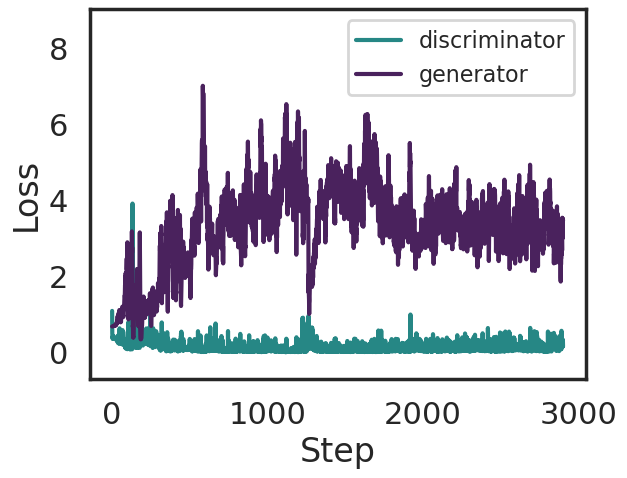

In [30]:
#Plotting the losses of the discriminator and the generator
fig, ax = plt.subplots()

sns.lineplot(data=loss, x=np.arange(0,2900),y='dim_loss',sort=False, label = 'discriminator',color='#268785')
sns.lineplot(data=loss, x=np.arange(0,2900),y='gen_loss',sort=False, label = 'generator',color='#4A225D')

ax.legend(fontsize = 16)
ax.set_ylabel('Loss')
ax.set_xlabel('Step')
ax.set_ylim(-0.7,9)

/home/enishiwaki/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch: 0 Loss D.: 0.3498249053955078
Epoch: 0 Loss G.: 0.696639358997345
Epoch: 10 Loss D.: 0.06569445133209229
Epoch: 10 Loss G.: 2.796370267868042
Epoch: 20 Loss D.: 0.014441379345953465
Epoch: 20 Loss G.: 5.408197402954102
Epoch: 30 Loss D.: 0.019131777808070183
Epoch: 30 Loss G.: 4.2758469581604
Epoch: 40 Loss D.: 0.008632163517177105
Epoch: 40 Loss G.: 4.969393253326416
Epoch: 50 Loss D.: 0.01009509339928627
Epoch: 50 Loss G.: 4.285743713378906
Epoch: 60 Loss D.: 0.047232735902071
Epoch: 60 Loss G.: 3.4637863636016846
Epoch: 70 Loss D.: 0.044268831610679626
Epoch: 70 Loss G.: 4.014378547668457
Epoch: 80 Loss D.: 0.07169120013713837
Epoch: 80 Loss G.: 3.0077250003814697
Epoch: 90 Loss D.: 0.044278163462877274
Epoch: 90 Loss G.: 3.942612648010254
length loss dim: 2900
length loss gen: 2900
       BUDAPEST     BARANYA       BACS      BEKES      BORSOD   CSONGRAD  \
0    191.376053  128.448883  72.977997  67.235176  159.777145  50.094490   
1    123.976326   83.580467  16.601992  41.4

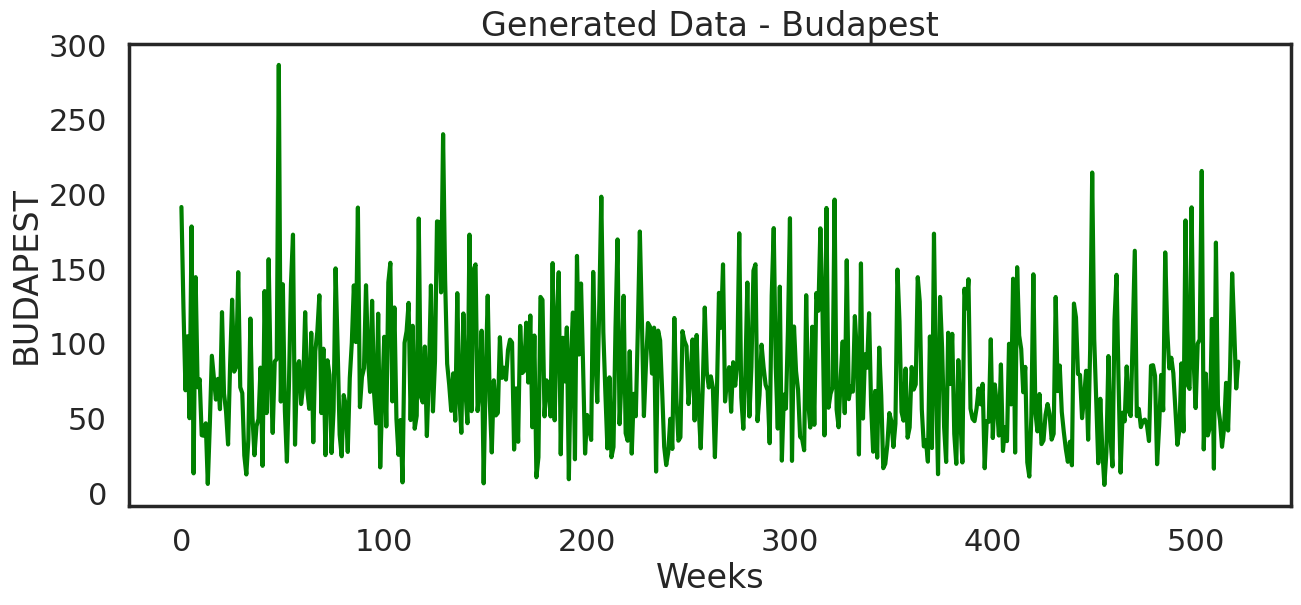

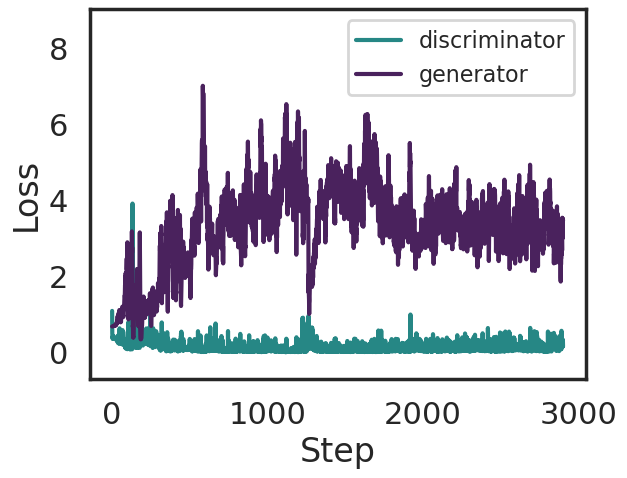

In [1]:
import dataloader

In [10]:
# After training the Gen, generates data as tensors
latent_space_samples = torch.randn((num_data), df_dim)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()

In [11]:
# Takes the generated data and turns it into a pandas DataFrame
df_gen=pd.DataFrame(generated_samples, columns=names)
df_gen

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,68.049141,26.385830,2.357100,21.860418,-14.077543,23.236834,19.381813,50.604401,44.341393,9.370233,27.368380,39.130081,20.628857,57.211189,31.303711,19.544584,29.375563,24.414038,42.225052,16.571449
1,81.909180,30.222157,82.638649,13.243493,100.962189,20.377560,46.385708,47.054592,58.553726,28.934511,84.302376,22.532017,-7.493997,12.250928,4.089254,19.944756,5.349391,24.179134,50.747517,24.213900
2,29.557823,50.825443,49.868401,-19.438274,53.381687,24.313637,44.093761,33.310497,10.750972,4.444375,26.844337,10.632729,37.327339,91.182404,28.555063,5.883950,11.190838,31.873055,59.648262,2.111625
3,64.769112,32.927605,52.747677,-6.111316,75.843376,25.836246,28.093407,26.690887,18.950474,3.668201,51.976643,22.041145,30.106312,66.714661,21.759893,13.743771,34.941021,34.929222,69.116760,24.957525
4,100.964066,23.700937,32.358330,45.181843,23.474827,27.502131,31.274023,63.623108,83.019028,33.526646,49.502171,51.798950,0.969770,43.105270,22.995594,36.158997,18.440050,14.850147,39.038666,22.583941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,68.388443,26.870886,66.976173,0.324440,85.226395,20.147511,35.292339,32.809544,33.851551,13.016705,71.465675,20.968065,6.413507,27.679777,5.604160,12.582948,20.971849,29.756245,56.102798,23.283295
518,120.426407,25.985598,71.874908,24.759405,68.828392,28.748104,32.891418,41.276913,46.043438,14.442205,93.720329,42.037617,0.275036,25.960297,6.558292,20.869497,38.889256,48.008633,55.965462,40.194191
519,38.561626,50.479004,57.218941,-12.470945,71.338371,25.422056,53.479073,41.789482,26.198551,9.610817,29.562635,14.456409,34.771519,96.201424,31.647451,15.008986,5.329341,29.667778,65.554016,2.412764
520,46.668293,15.069393,39.758385,6.352544,45.099167,12.729368,21.395405,21.441387,23.663383,9.981543,43.313164,14.851430,0.251256,12.172738,3.761107,10.029046,10.192449,18.287607,28.815485,15.672802


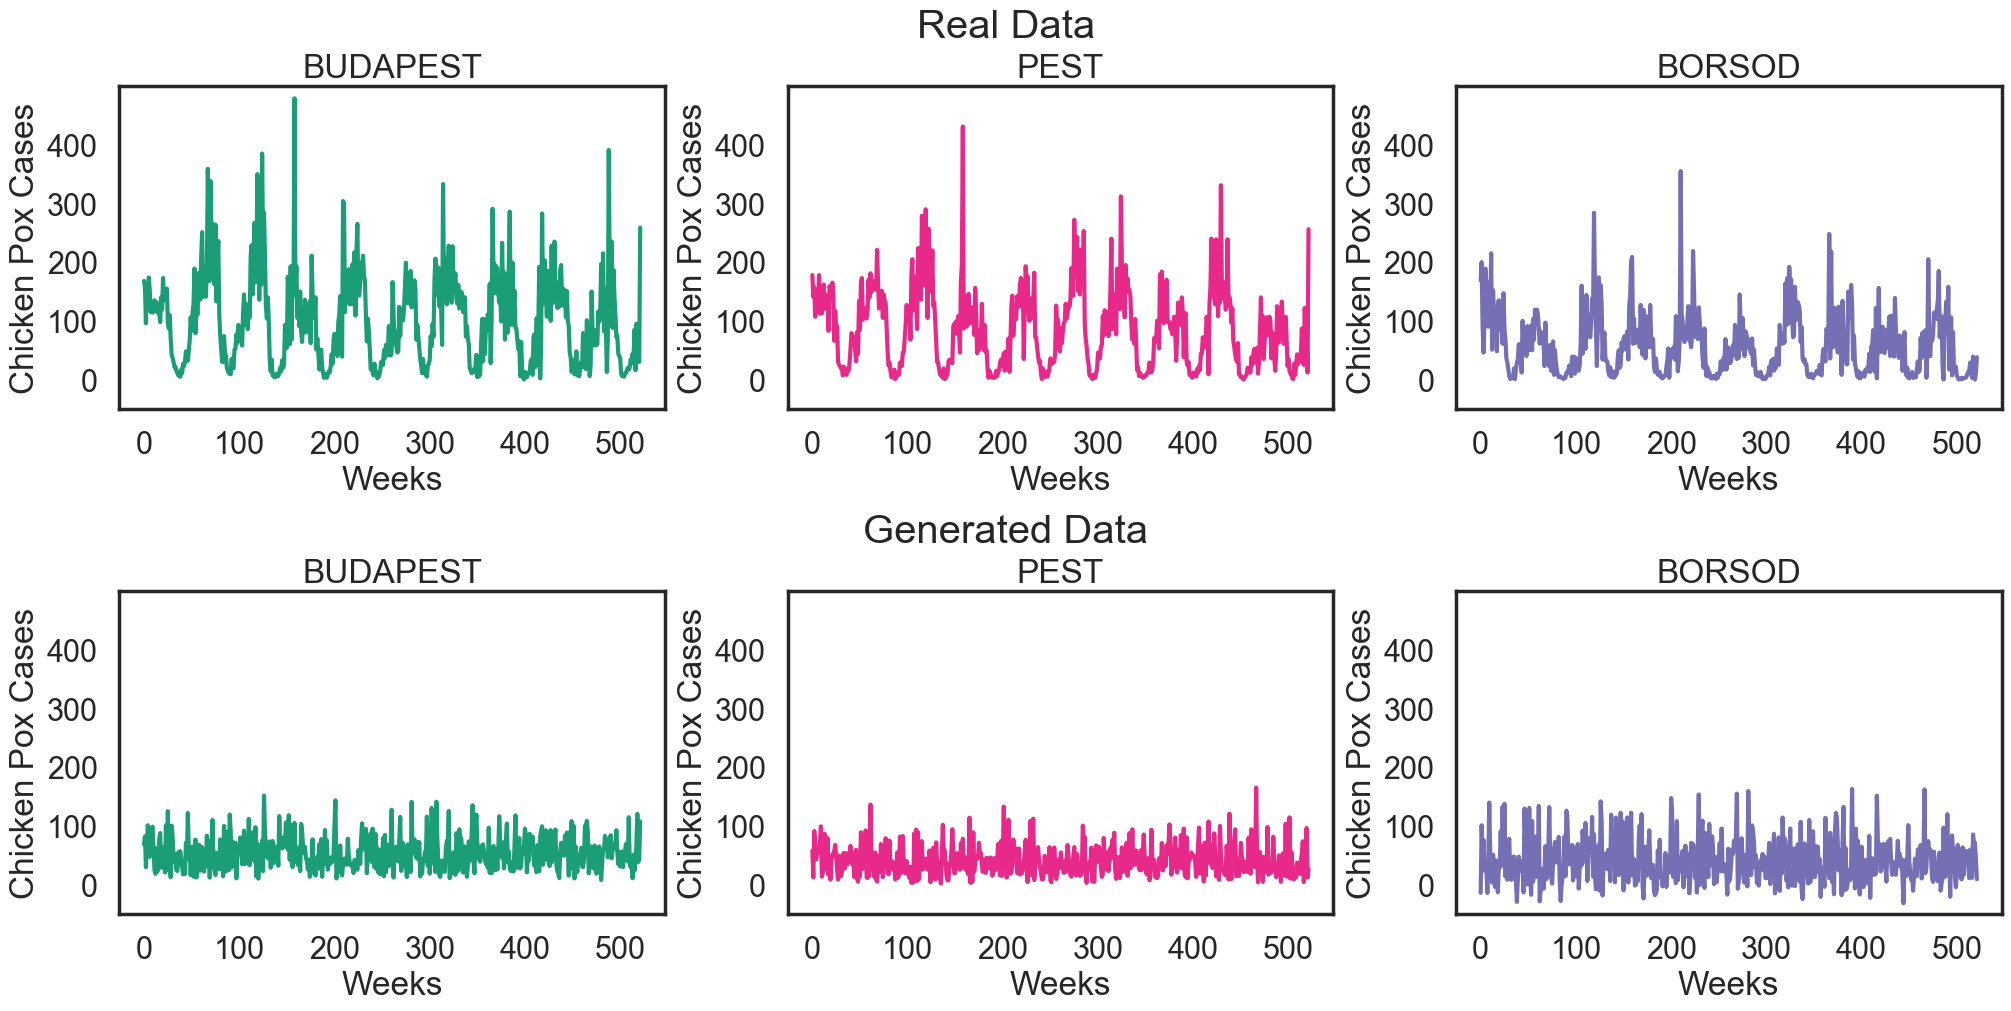

In [118]:
fig = plt.figure(constrained_layout=True, figsize=(20,10))
#fig.suptitle('Real vs. Generated Data')

df_list = [df, df_gen]
colors = ['#1b9e77','#e7298a', '#7570b3']
sub_titles = ['Real Data', 'Generated Data']
plot_titles = ['BUDAPEST', 'PEST', 'BORSOD']

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=2, ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(sub_titles[row])

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3)
    for col, ax in enumerate(axs):
        sns.lineplot(data=df_list[row],x=df.iloc[0:].index,y=plot_titles[col], ax=axs[col], color=colors[col], alpha=1)
        ax.set_title(plot_titles[col])
        ax.set_xticks(np.arange(0,550,100))
        ax.set_ylim(-50, 500)
        ax.set_yticks(np.arange(0,500,100))
        ax.set_xlabel('Weeks')
        ax.set_ylabel('Chicken Pox Cases')

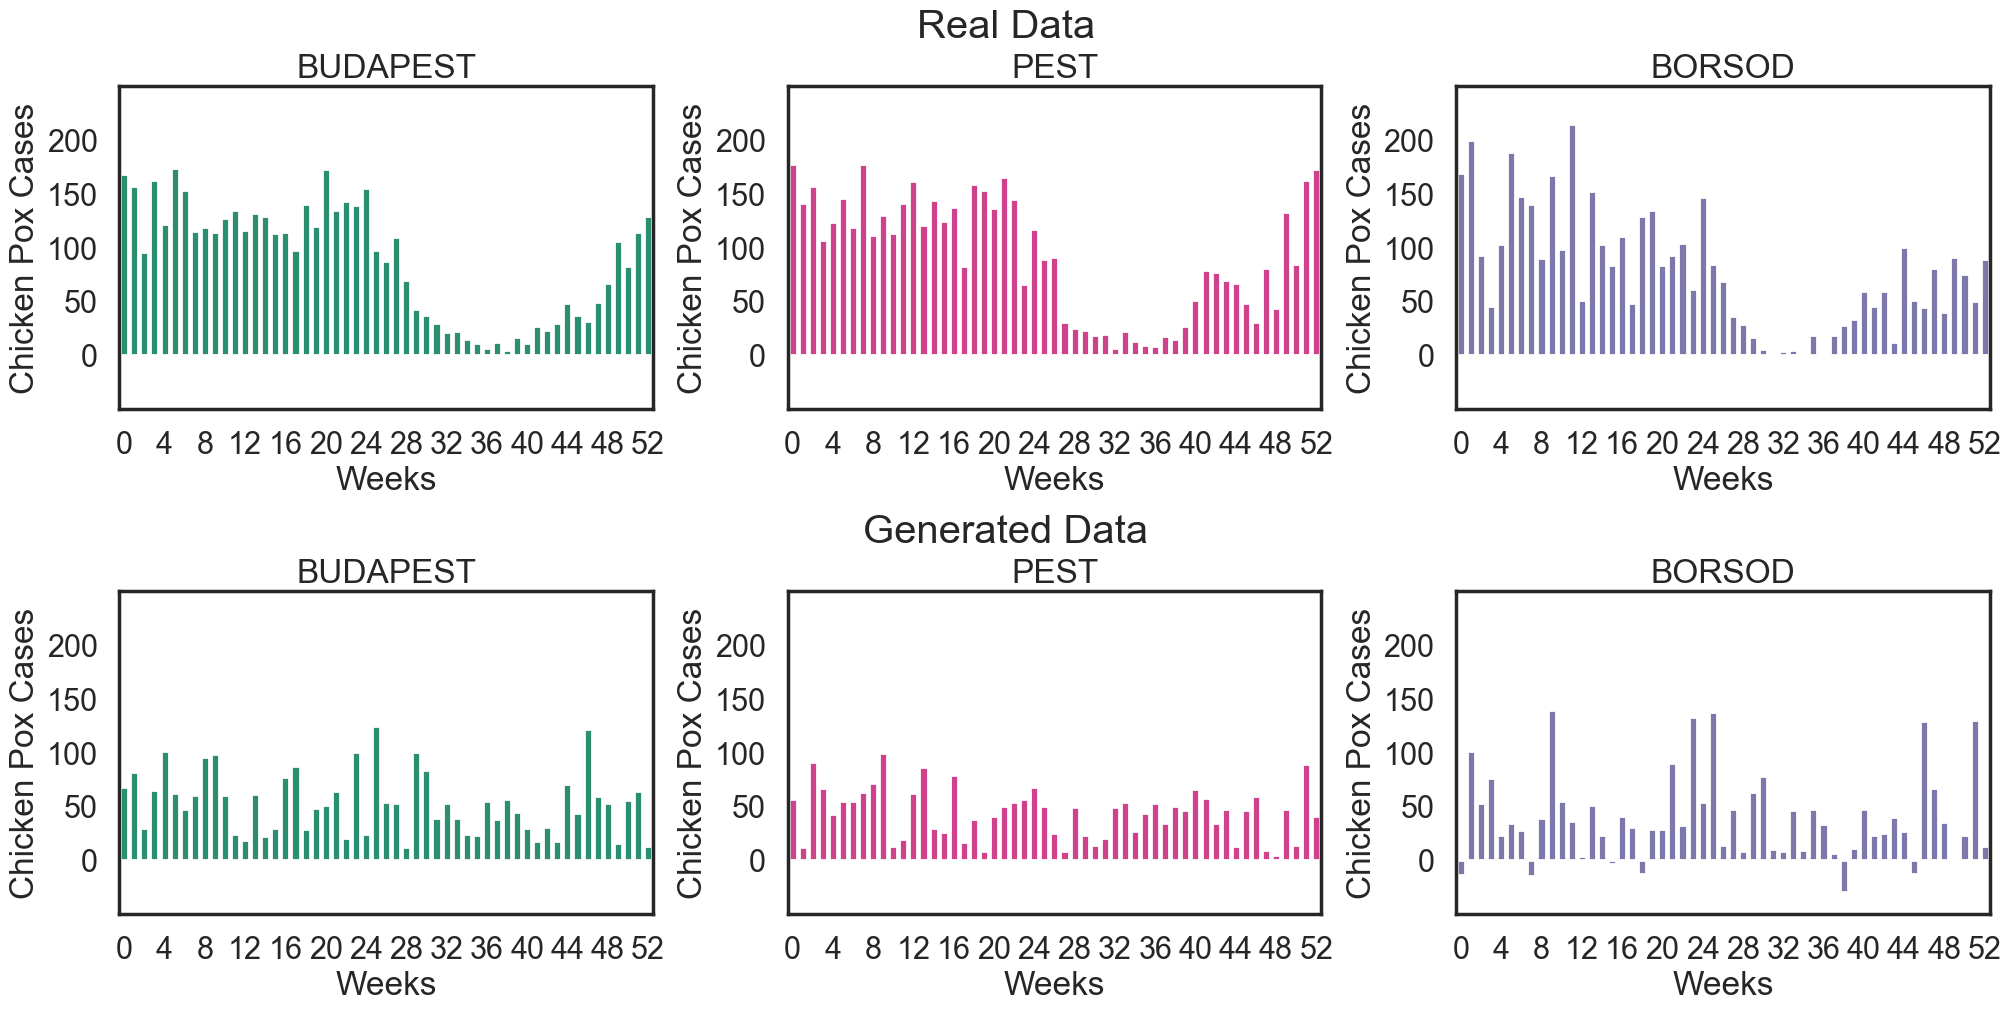

In [120]:
fig = plt.figure(constrained_layout=True, figsize=(20,10))
#fig.suptitle('Real vs. Generated Data')

df_list = [df.head(53), df_gen.head(53)]
colors = ['#1b9e77','#e7298a', '#7570b3']
sub_titles = ['Real Data', 'Generated Data']
plot_titles = ['BUDAPEST', 'PEST', 'BORSOD']

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=2, ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(sub_titles[row])

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3)
    for col, ax in enumerate(axs):
        sns.barplot(data=df_list[row],x=df.iloc[0:53].index,y=plot_titles[col], ax=axs[col], color=colors[col], alpha=1)
        ax.set_title(plot_titles[col])
        ax.set_xticks(np.arange(0,53,4))
        ax.set_ylim(-50, 250)
        ax.set_yticks(np.arange(0,250,50))
        ax.set_xlabel('Weeks')
        ax.set_ylabel('Chicken Pox Cases')


In [22]:
# sns.set_style('white')
# sns.set_context('talk')
# fig, axes = plt.subplots(1,3, figsize=(20,5))
# #fig.tight_layout()

# sns.lineplot(data=df_gen, x=df.index, y='BUDAPEST', ax=axes[0])
# axes[0].set_xlabel('Weeks')
# axes[0].set_ylabel('Chicken Pox Cases')
# axes[0].set_title('BUDAPEST')

# sns.lineplot(data=df_gen, x=df.index, y='PEST', ax=axes[1])
# axes[1].set_xlabel('Weeks')
# axes[1].set_ylabel('Chicken Pox Cases')
# axes[1].set_title('PEST')

# sns.lineplot(data=df_gen, x=df.index, y='BORSOD', ax=axes[2])
# axes[2].set_xlabel('Weeks')
# axes[2].set_ylabel('Chicken Pox Cases')
# axes[2].set_title('BORSOD')

In [23]:
# fig, axes = plt.subplots(1,3,figsize=(20,5))
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.3,
#                     hspace=0.3)

# sns.lineplot(data=df,x=df.index,y='BUDAPEST',ax=axes[0], color='#373c38', alpha=1, label='Real')
# sns.lineplot(data=df_gen,x=df.index,y='BUDAPEST',ax=axes[0], color='#1b9e77', alpha=0.75, label='Generated')
# axes[0].set_xticks(np.arange(0,550,100))
# axes[0].set_xlabel('Weeks')
# axes[0].set_ylabel('Chicken Pox Cases')
# axes[0].set_title('BUDAPEST')

# sns.lineplot(data=df,x=df.index,y='PEST',ax=axes[1], color='#373c38', label='Real')
# sns.lineplot(data=df_gen, x=df.index, y='PEST', ax=axes[1], color='#e7298a', alpha=0.75, label='Generated')
# axes[1].set_xticks(np.arange(0,550,100))
# axes[1].set_xlabel('Weeks')
# axes[1].set_ylabel('Chicken Pox Cases')
# axes[1].set_title('PEST')

# sns.lineplot(data=df,x=df.index,y='BORSOD',ax=axes[2], color='#373c38', label='Real')
# sns.lineplot(data=df_gen, x=df.index, y='BORSOD', ax=axes[2], color='#7570b3', alpha=0.75, label='Generated')
# axes[2].set_xticks(np.arange(0,550,100))
# axes[2].set_xlabel('Weeks')
# axes[2].set_ylabel('Chicken Pox Cases')
# axes[2].set_title('BORSOD');

In [24]:
# fig, axes = plt.subplots(2,3,figsize=(20,10))
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.3,
#                     hspace=0.3)

# subfigs = fig.subfigures

# sns.barplot(data=df,x=df.iloc[0:53].index,y=df['BUDAPEST'].head(53),ax=axes[0,0], color='#373c38', alpha=1, label='Real')
# axes[0,0].set_xticks(np.arange(0,53,4))
# axes[0,0].set_xlabel('Weeks')
# axes[0,0].set_ylabel('Chicken Pox Cases')
# axes[0,0].set_title('BUDAPEST')

# sns.barplot(data=df,x=df.iloc[0:53].index,y=df['PEST'].head(53),ax=axes[0,1], color='#373c38', label='Real')
# axes[0,1].set_xticks(np.arange(0,53,4))
# axes[0,1].set_xlabel('Weeks')
# axes[0,1].set_ylabel('Chicken Pox Cases')
# axes[0,1].set_title('PEST')

# sns.barplot(data=df,x=df.iloc[0:53].index,y=df['BORSOD'].head(53),ax=axes[0,2], color='#373c38', label='Real')
# axes[0,2].set_xticks(np.arange(0,53,4))
# axes[0,2].set_xlabel('Weeks')
# axes[0,2].set_ylabel('Chicken Pox Cases')
# axes[0,2].set_title('BORSOD')

# sns.barplot(data=df_gen,x=df.iloc[0:53].index,y=df_gen['BUDAPEST'].head(53),ax=axes[1,0], color='#1b9e77', alpha=0.75, label='Generated')
# axes[1,0].set_xticks(np.arange(0,53,4))
# axes[1,0].set_xlabel('Weeks')
# axes[1,0].set_ylabel('Chicken Pox Cases')

# sns.barplot(data=df_gen, x=df.iloc[0:53].index, y=df_gen['PEST'].head(53), ax=axes[1,1], color='#e7298a', alpha=0.75, label='Generated')
# axes[1,1].set_xticks(np.arange(0,53,4))
# axes[1,1].set_xlabel('Weeks')
# axes[1,1].set_ylabel('Chicken Pox Cases')

# sns.barplot(data=df_gen, x=df.iloc[0:53].index, y=df_gen['BUDAPEST'].head(53), ax=axes[1,2], color='#7570b3', alpha=0.75, label='Generated')
# axes[1,2].set_xticks(np.arange(0,53,4))
# axes[1,2].set_xlabel('Weeks')
# axes[1,2].set_ylabel('Chicken Pox Cases')